# MÓDULO 1 - ANÁLISE EXPLORATÓRIA DAS AÇÕES: 


Análise exploratória e algoritmos de TIME SERIES feitos em diversas empresas como *Magazine Luiza*, *Azul* e *Gol* para visualização geral das ações de 2015 - 2024


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from prophet import Prophet
from pandas_datareader import data
import yfinance as yf
import os
from datetime import datetime
from prophet.plot import plot_components_plotly
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error
from scipy.special import jv
import matplotlib.image as mpimg



Download dos dados diretamente do Yahoo Finance



In [3]:
#Lista de ações
acoes = ['GOLL4.SA', 'AZUL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

acoes_df = pd.DataFrame()


for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']



csv_file = 'database//acoes.csv'

if not os.path.exists(csv_file):
    acoes_df.to_csv(csv_file)
    print(f"Arquivo '{csv_file}' salvo com sucesso!")
else:
    
    print(f"O arquivo '{csv_file}' já existe. Nenhuma ação realizada.")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

O arquivo 'database//acoes.csv' já existe. Nenhuma ação realizada.


Tratamento de valores faltantes

In [4]:
acoes_df.fillna(acoes_df.mean(), inplace=True) 


## Plot de todos os histogramas


<Axes: xlabel='GOLL4.SA', ylabel='Count'>

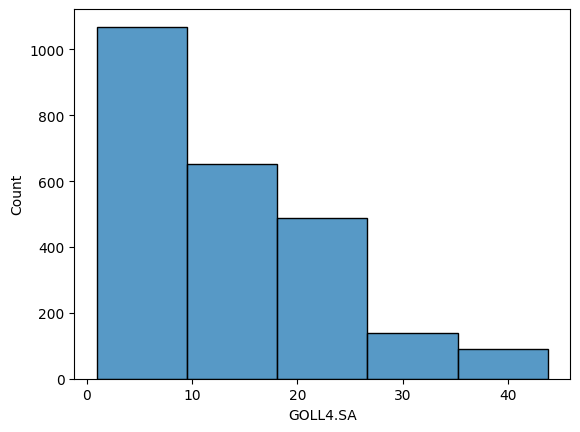

In [5]:
sns.histplot(acoes_df['GOLL4.SA'],bins=5)

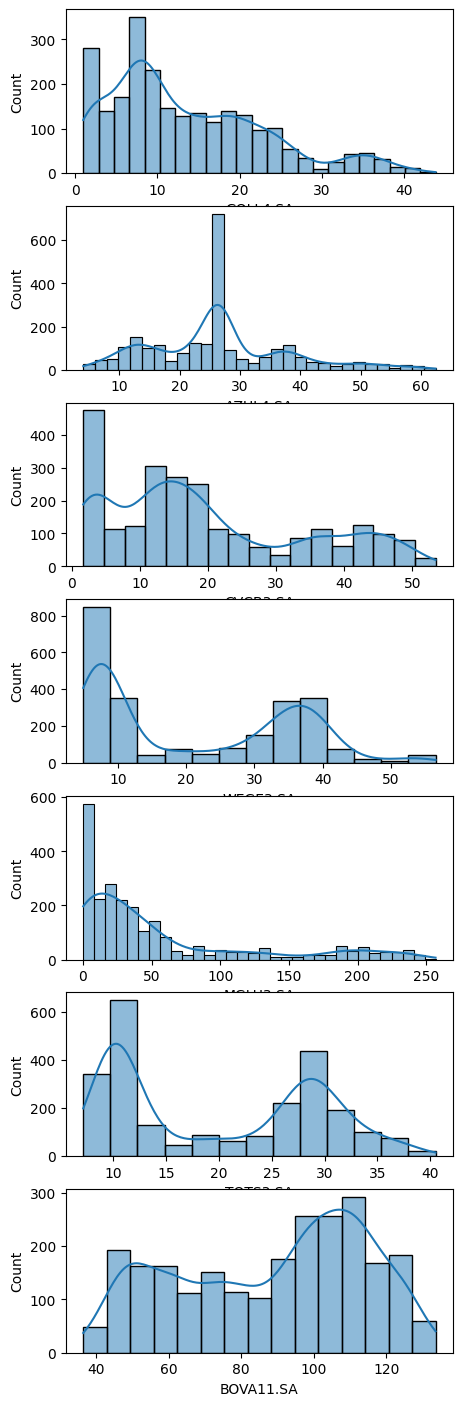

In [6]:
plt.figure(figsize=(5,20))
for i in np.arange(0,len(acoes_df.columns)):
    plt.subplot(8,1,i+1)
    sns.histplot(acoes_df[acoes_df.columns[i]],kde=True)

## *Outliers de todas as empresas*

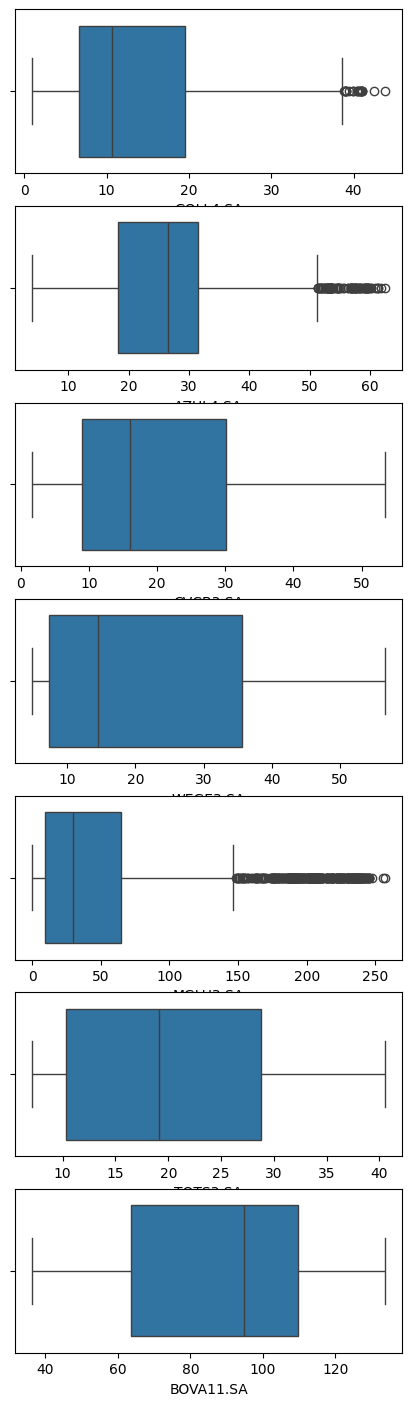

In [7]:

plt.figure(figsize=(5,20))
for i in np.arange(0,len(acoes_df.columns)):
    plt.subplot(8,1,i+1)
    sns.boxplot(x=acoes_df[acoes_df.columns[i]])
    
#CONSIGO ENTENDER A RELAÇÃO DE OUTLIERS E VER A ESTABILIDADE DOS DADOS

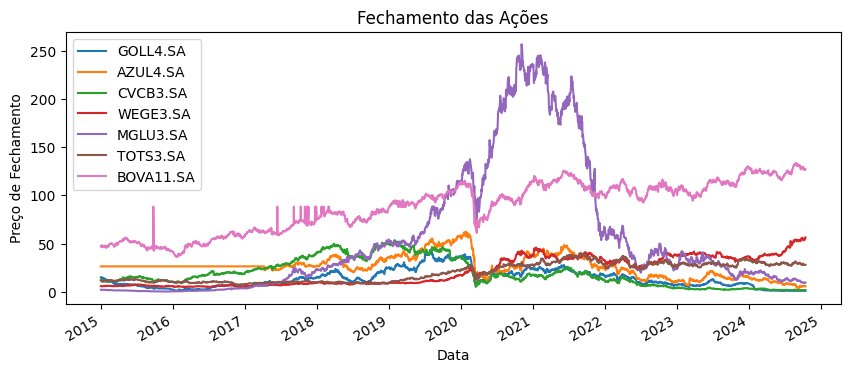

In [8]:

acoes_df.plot(figsize=(10, 4))
plt.title('Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend(acoes)
plt.show()


Normalização a fim de padronizar os preços e identificar melhor as tendências sem viés de valores:

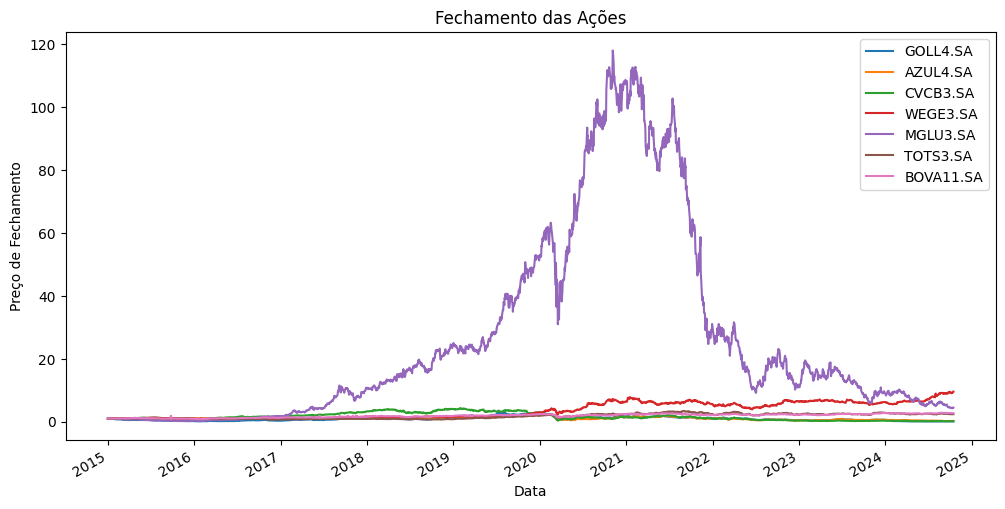

In [9]:
acoes_df_norm = acoes_df.copy()
#Copia para não mexer no df original
for i in acoes_df_norm.columns:
    acoes_df_norm[i] = acoes_df_norm[i] / acoes_df_norm[i].iloc[0]  



acoes_df_norm.plot(figsize=(12, 6))
plt.title('Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend(acoes)
plt.show()


EXTRA!!! :

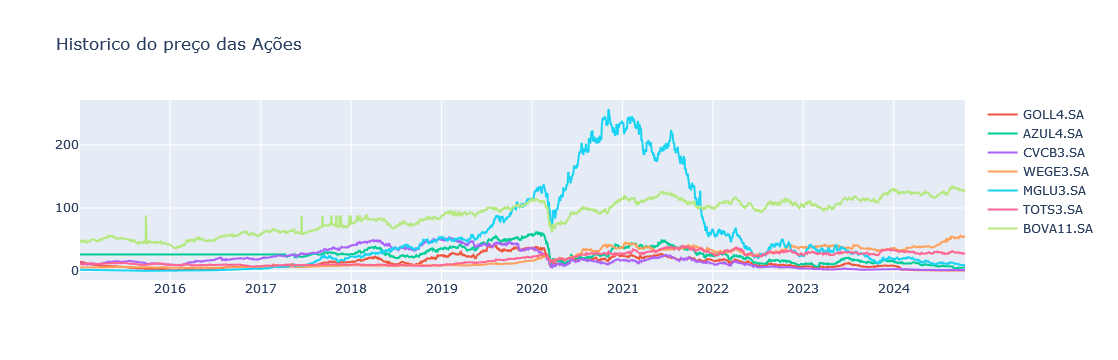

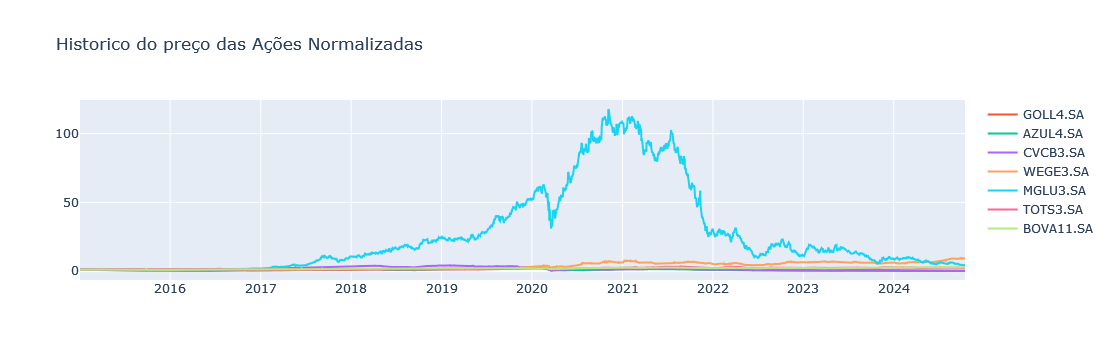

In [10]:
#GRÁFICOS DINAMICOS para visualização mais interativa

figura = px.line(title='Historico do preço das Ações')
for i in acoes_df.columns:
    figura.add_scatter(x=acoes_df.index,y=acoes_df[i],name=i)
figura.show()


figura = px.line(title='Historico do preço das Ações Normalizadas')
for i in acoes_df_norm.columns:
    figura.add_scatter(x=acoes_df_norm.index,y=acoes_df_norm[i],name=i)
figura.show()

# MÓDULO 2 - APRENDIZADO DE MÁQUINA: 
## Modelo TIME SERIES para previsão de preços nos anos seguintes na empresa: Magazine Luiza

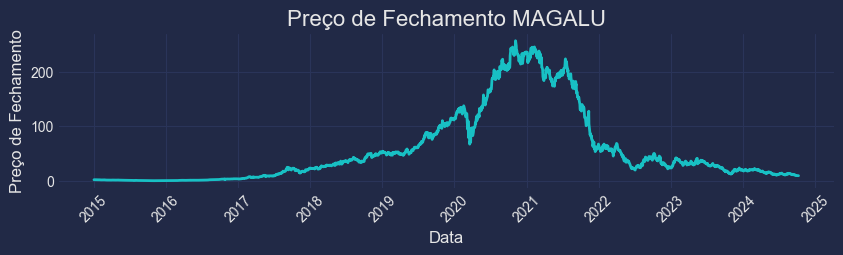

In [11]:
plt.style.use('C:/Users/Edu/Desktop/Estudo/11-ML-DEFINITIVO/EXPERT_ACADEMY/2_Economia_Ml/pitayasmoothie-dark.mplstyle')


dataset = pd.read_csv('database//acoes.csv')


dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')
#adsadas


dataset.set_index('Date', inplace=True)


time_series = dataset['MGLU3.SA']

plt.figure(figsize=(10, 2))
plt.plot(time_series, linewidth=2)
plt.title('Preço de Fechamento MAGALU', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



PREVISOES ARIMA:
(Célula demora para rodar)

In [12]:
n_test_days = 365
a = len(time_series) - n_test_days
treinamento = time_series[:a]
teste = time_series[a:]
n_periods = len(teste)

modelo_arima = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')


previsoes_arima = modelo_arima.predict(n_periods=n_periods, return_conf_int=False, 
start=len(treinamento))

previsoes_arima = pd.DataFrame(previsoes_arima,columns=['previsoes_arima'])
previsoes_arima.index = teste.index


mae_arima = mean_absolute_error(teste, previsoes_arima['previsoes_arima'])




C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



ERRO MÉDIO ABSOLUTO: 

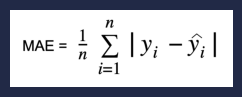

In [27]:
img = mpimg.imread("C:/Users/Edu/Desktop/Estudo/11-ML-DEFINITIVO/EXPERT_ACADEMY/2_Economia_Ml/mean_absolute_error.png")

# Exibir a imagem
plt.figure(figsize=(4, 1))
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [22]:
mae_arima

10.574734385934125

# PREVISOES PROPHET 

In [16]:
from prophet.plot import plot_plotly, plot_components_plotly

df_prophet = dataset.reset_index(level=0)[['Date', 'MGLU3.SA']]
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'MGLU3.SA': 'y'})


modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)


futuro = modelo_prophet.make_future_dataframe(periods=n_test_days)
previsoes_prophet = modelo_prophet.predict(futuro)


previsoes_prophet_test = previsoes_prophet.set_index('ds').loc[teste.index]['yhat']


mae_prophet = mean_absolute_error(teste, previsoes_prophet_test)


20:35:01 - cmdstanpy - INFO - Chain [1] start processing
20:35:01 - cmdstanpy - INFO - Chain [1] done processing


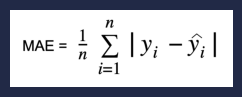

In [28]:
img = mpimg.imread("C:/Users/Edu/Desktop/Estudo/11-ML-DEFINITIVO/EXPERT_ACADEMY/2_Economia_Ml/mean_absolute_error.png")

# Exibir a imagem
plt.figure(figsize=(4, 1))
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [29]:
mae_prophet

3.835483132240485

O modelo prophet possui mais precisão em suas previsões. Obtendo um erro absoluto médio de aproximadamente 4 unidades. 

Mean Absolute Error (ARIMA): 10.574734385934125
Mean Absolute Error (Prophet): 3.835483132240485


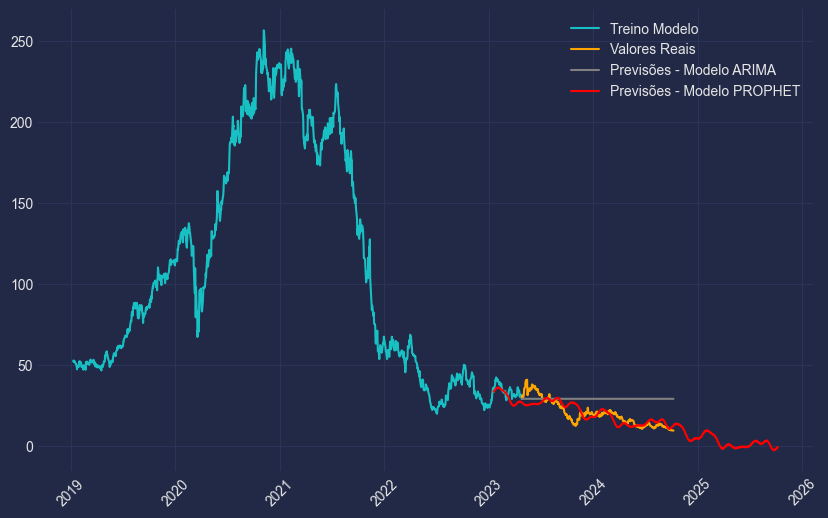

In [35]:
plot_plotly(modelo_prophet,previsoes_prophet)
plot_components_plotly(modelo_prophet,previsoes_prophet)

# Plota os gráficos do Prophet

# Exibe os erros médios absolutos
print(f'Mean Absolute Error (ARIMA): {mae_arima}')
print(f'Mean Absolute Error (Prophet): {mae_prophet}')

# Plota o gráfico principal
plt.figure(figsize=(10, 6))
plt.plot(treinamento[1000:], label='Treino Modelo')
plt.plot(teste, label='Valores Reais', color='orange')
plt.plot(previsoes_arima, label='Previsões - Modelo ARIMA', color='grey')
plt.plot(previsoes_prophet['ds'][2000:2800], previsoes_prophet['yhat'][2000:2800], label='Previsões - Modelo PROPHET', color='red')

plt.xticks(rotation=45)
plt.grid('on')
plt.legend()


In [45]:
previsoes_prophet[['yhat','ds']].tail(365)

yhat         ds
2432  12.923709 2024-10-09
2433  13.149679 2024-10-10
2434  13.289282 2024-10-11
2435  13.578075 2024-10-12
2436  13.678820 2024-10-13
...         ...        ...
2792  -1.083594 2025-10-04
2793  -0.886480 2025-10-05
2794  -1.177468 2025-10-06
2795  -0.809385 2025-10-07
2796  -0.565362 2025-10-08

[365 rows x 2 columns]

ds = data 
yhat = valor de fechamento
